# 04. Train LSTM Model
* we'll train LSTM Model!
* **Output File** : **`210512_MobileNet_model_epoch100.h5`** (trained LSTM Model! It contains weights et al.)
* **`Before run this file, Please check this`**:
    * 01_video-to-numpy-save.ipynb
    * 02_create-numpy-datasets_training-test.ipynb
    * 03_MobileNet.ipynb
* **`Are those files exist on there?`** Those files were made by 01~03_MobileNet.ipynb files.
    * Training set, data : MobileNet_x_train_reshaped_210512.npy
    * Training set, label : 02_label_training_Numpy_210512.npy
    * Test set, data : MobileNet_x_test_reshaped_210512.npy
    * Test set, label : 02_label_test_Numpy_210512.npy

# Import

In [1]:
import numpy as np 
import os 
import tensorflow as tf
from tensorflow import keras 
import time 
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8610965057959598168
]


# 04-A. Load feature datasets
* **`MobileNet_x_train_reshaped_210512.npy`**, **`MobileNet_x_test_reshaped_210512.npy`** : Data that throughed MobileNet and reshaped Numpy arrays
* **`02_label_training_Numpy_210512.npy`**, **`02_label_test_Numpy_210512`** : Label Numpy arrays

In [3]:
X_train_reshaped=np.load('D:/datasets/AllVideo_numpy_list_pickle/MobileNet_x_train_reshaped_210512.npy')
#> (2878, 30, 25600)

In [4]:
X_test_reshaped=np.load('D:/datasets/AllVideo_numpy_list_pickle/MobileNet_x_test_reshaped_210512.npy')
#> (720, 30, 25600)

In [5]:
y_train=np.load('D:/datasets/AllVideo_numpy_list_pickle/02_label_training_Numpy_210512.npy')
#> (2878, 2) 

In [6]:
y_test=np.load('D:/datasets/AllVideo_numpy_list_pickle/02_label_test_Numpy_210512.npy')
#> (720, 2)

In [7]:
X_train_reshaped.shape, X_test_reshaped.shape #> (# of video file, # of frame img, 25600)

((2878, 30, 25600), (720, 30, 25600))

In [8]:
y_train.shape, y_test.shape #> (# of video file, # of class)

((2878, 2), (720, 2))

In [9]:
y_train[10:30]

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

# 04-B. Create LSTM Model
* **`chunk_size`** : 5x5x1024
* **`n_chunks`** : fps. # of frame img per second

In [10]:
chunk_size=25600
n_chunks=30

model=keras.models.Sequential()
model.add(keras.layers.LSTM(512, input_shape=(n_chunks, chunk_size))) # (30, 25600)
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Activation('softmax'))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               53479424  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0

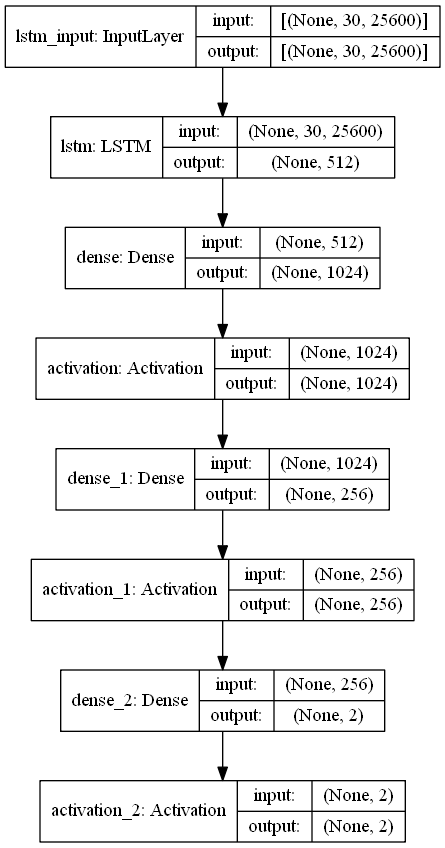

In [13]:
keras.utils.plot_model(model, show_shapes=True)

# 04-C. Define Callbacks

In [14]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('210512_MobileNet_checkpoint_epoch100.h5', save_best_only=True)

# 04-D. Train LSTM Model

In [15]:
np.random.seed(42)

In [16]:
epoch=100
batchS=500
history=model.fit(x=X_train_reshaped[0:2100], y=y_train[0:2100],
                  epochs=epoch,
                  validation_data=(X_train_reshaped[2100:], y_train[2100:]),
                  callbacks=[checkpoint_cb],
                  batch_size=batchS, verbose=2)

Epoch 1/100
5/5 - 135s - loss: 0.2837 - accuracy: 0.5590 - val_loss: 0.1918 - val_accuracy: 0.7044
Epoch 2/100
5/5 - 51s - loss: 0.2004 - accuracy: 0.6867 - val_loss: 0.1761 - val_accuracy: 0.7326
Epoch 3/100
5/5 - 61s - loss: 0.1583 - accuracy: 0.7724 - val_loss: 0.1619 - val_accuracy: 0.7571
Epoch 4/100
5/5 - 58s - loss: 0.1392 - accuracy: 0.8000 - val_loss: 0.1533 - val_accuracy: 0.7571
Epoch 5/100
5/5 - 58s - loss: 0.1092 - accuracy: 0.8543 - val_loss: 0.1419 - val_accuracy: 0.7918
Epoch 6/100
5/5 - 63s - loss: 0.0755 - accuracy: 0.9076 - val_loss: 0.1397 - val_accuracy: 0.8059
Epoch 7/100
5/5 - 59s - loss: 0.0497 - accuracy: 0.9452 - val_loss: 0.1296 - val_accuracy: 0.8226
Epoch 8/100
5/5 - 58s - loss: 0.0288 - accuracy: 0.9710 - val_loss: 0.1391 - val_accuracy: 0.8136
Epoch 9/100
5/5 - 58s - loss: 0.0186 - accuracy: 0.9819 - val_loss: 0.1451 - val_accuracy: 0.7995
Epoch 10/100
5/5 - 57s - loss: 0.0161 - accuracy: 0.9848 - val_loss: 0.1625 - val_accuracy: 0.8033
Epoch 11/100
5/5 -

# 04-E. Evaluate trained LSTM Model

## 1. Evaluate LSTM Model by using test set

In [17]:
result=model.evaluate(X_test_reshaped, y_test)

23/23 [==============================] - 21s 893ms/step - loss: 0.1390 - accuracy: 0.8319


 ## 2. Accuracy & Loss of trained LSTM Model

In [18]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.13901832699775696
accuracy 0.831944465637207


## 3. Draw plot of Accuracy & Loss

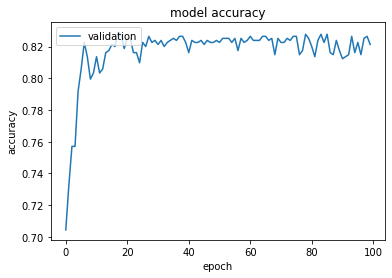

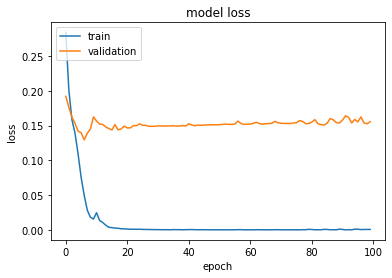

In [19]:
plt.plot(history.history['val_accuracy']) # Draw Accuracy plot
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.savefig('210512_MobileNet_model_accuracy_epoch100.jpg') #save .jpg img of Accuracy plot
plt.show()

plt.plot(history.history['loss']) # Draw Loss plot
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('210512_MobileNet_model_loss_epoch100.jpg') #save .jpg img of Loss plot
plt.show()

# 04-F. Save Model File
* You can use this .h5 model file in other code file.

In [20]:
model.save('210512_MobileNet_model_epoch100.h5', include_optimizer=True)